## Random Walk Generation

In order to generate random stock returns, we will us the following function:


$$ \frac{S_{t+dt} - S_{t}}{S_{t}} = \mu dt + \sigma\sqrt{dt}\chi_{t} $$

which is the same we had in the notebook 3, but in this case we have $\mu = r + \sigma\lambda$.

Let's create a function for Geometric Brownian Motion:


In [15]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model.
    n_years: duration of evolution
    n_scenarios: number of stocks
    mu: expected annualized return
    sigma: annualized volatility
    steps_per_year: number of "dts" in a year, that is, number of returns per year
    s_0: initial stock price
    """
    
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    #We generate random numbers with mean (1 + mu*dt) and standard deviation sigma*sqrt(dt).
    # If we do this, our function will be much faster than if we generate random numbers following
    #standard gaussian distribution. The 1 is added already too because we are going to calculate the cummulative product
    rets_plus_1 = pd.DataFrame(np.random.normal(loc=1+mu*dt, scale=sigma*np.sqrt(dt),size = (n_steps,n_scenarios)))
    stock_price = s_0*rets_plus_1.cumprod()
    return stock_price
    
    

In [48]:
p = erk.gbm(n_scenarios=3)
p

,0,1,2
0,100.000000,100.000000,100.000000
1,107.511476,97.328549,94.342458
2,98.481147,102.235488,90.520664
3,101.245460,105.527855,88.755188
4,98.450737,104.885118,97.325547
...,...,...,...
115,176.293527,129.036142,148.405679
116,178.878740,136.063954,143.511302
117,177.656223,122.475609,140.816975
118,183.350336,135.367408,141.454542


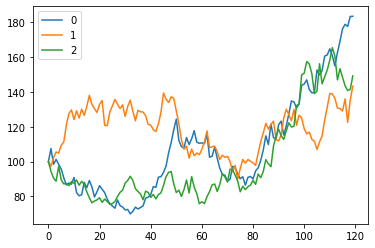

In [49]:
p.plot()